<a href="https://colab.research.google.com/github/vini-queiroz/python_data_science/blob/main/Aula_11_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o arquivo CSV
df = pd.read_csv('/content/Salary_dataset.csv')

In [17]:
df.shape

# Limpamos a coluna Unnamed: 0, que não possui informações relavantes para a análise
df.drop('Unnamed: 0', axis=1, inplace=True)

# Checamos se há valores nulos ou duplicados na nossa tabela
print(df.isnull().sum())
print('\n', df.duplicated().sum())

# Imprimimos o baçalho
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


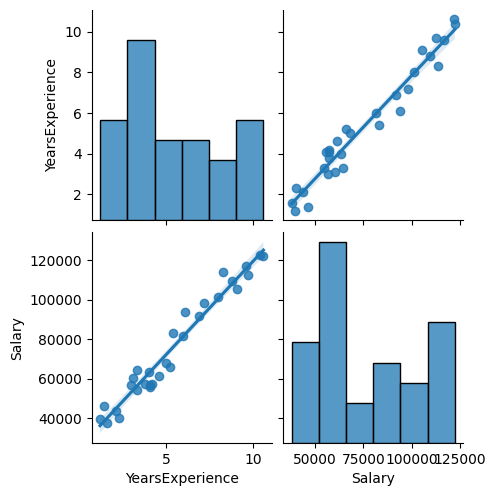

In [18]:
# Plotamos os graficos de correlação dos dados da tabela
sns.pairplot(data=df, kind='reg')

In [32]:
# Modelo de regressão linear simples...

# Importamos as bibliotecas de regressão do sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# atribuimos os dados tratados a correlação, x(var independentes) - neste utilizamos o reshape para tranforma-lo em uma matriz o formato que é aceito pelo modelo, e y(var dependentes)
x = np.array(df['YearsExperience']).reshape(-1,1)
y = df['Salary'].values

# Instanciamos o modelo de regressão linear e treinamos com o método fit, para que possamos fazer previsão baseadas no modelo.
regressao = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1).
regressao.fit(x, y)

# Por fim, mostramos os resultados da formula de regressão linear simples, y = aX + b, onde o x são os anos de experiencia, a é o coeficiente de regressão(ou coeficiente angular)
# e o b é o intercepto, ou seja, o valor que a reta cruza o eixo y.
print(f'Coeficiente de regresão (a): ', regressao.coef_)
print(f'Intercepto (b): ', regressao.intercept_)
print(f"R2:", regressao.score(x, y))

Coeficiente de regresão (a):  [9449.96232146]
Intercepto (b):  24848.203966523193
R2: 0.9569566641435086


In [46]:
# Utilizamos o modelo que acabamos de treinar para fazer previsão para uma lista de anos de experiência
for year in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
  print(f'Experiencia: {year}', f'Salário: {round(regressao.predict([[year]])[0])}')

Experiencia: 0 Salário: 24848
Experiencia: 1 Salário: 34298
Experiencia: 2 Salário: 43748
Experiencia: 3 Salário: 53198
Experiencia: 4 Salário: 62648
Experiencia: 5 Salário: 72098
Experiencia: 6 Salário: 81548
Experiencia: 7 Salário: 90998
Experiencia: 8 Salário: 100448
Experiencia: 9 Salário: 109898
Experiencia: 10 Salário: 119348
Experiencia: 11 Salário: 128798
Experiencia: 12 Salário: 138248


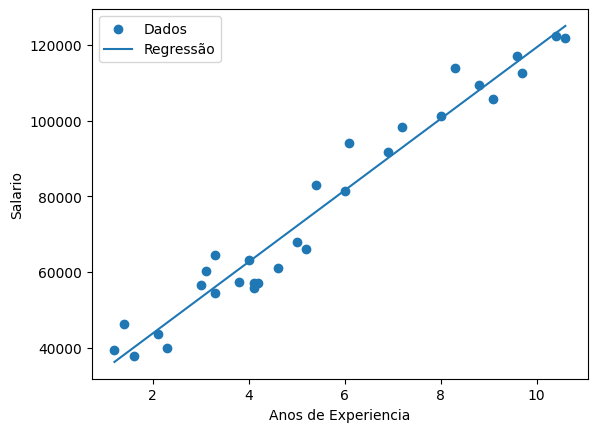

In [44]:
# Neste gráfico plotamos uma reta com valores estimados de salario, para os dados que já possuimos
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
plt.scatter(x, y, label='Dados')
plt.plot(xs, regressao.predict(xs), label='Regressão')
plt.legend()
plt.xlabel('Anos de Experiencia')
plt.ylabel('Salario')
plt.show()